<a href="https://colab.research.google.com/github/Sumitkevlani/End-to-End-ML-projects/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Data Collection And Processing**

In [46]:
big_mart_dataset = pd.read_csv('big_mart_sales_train.csv')

In [39]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
big_mart_dataset.shape

(8523, 12)

In [41]:
#getting the information about the dataset
big_mart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [42]:
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
big_mart_dataset['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**Categorical Variables**


*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type




In [50]:
#replace missing values with the mean values of the item weight
mean = big_mart_dataset['Item_Weight'].mean()
big_mart_dataset['Item_Weight'] = big_mart_dataset['Item_Weight'].fillna(mean)

big_mart_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
# Group the data by 'Outlet_Type' and calculate the mode of 'Outlet_Size' for each group
mode_by_outlet_type = big_mart_dataset.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])

# Fill missing values in 'Outlet_Size' based on the mode for each 'Outlet_Type'
big_mart_dataset['Outlet_Size'] = big_mart_dataset.apply(lambda row: mode_by_outlet_type[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'], axis=1)

In [52]:
mode_by_outlet_type

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [53]:
big_mart_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Exploratory Data Analysis**

<ipython-input-63-ae1c3a9fb516>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_dataset['Item_Weight'])


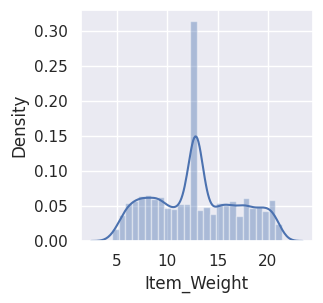

In [63]:
sns.set()
plt.figure(figsize=(3,3))
sns.distplot(big_mart_dataset['Item_Weight'])
plt.show()

<ipython-input-62-df5a9fa2b725>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_dataset['Item_Visibility'])


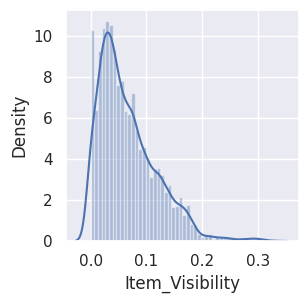

In [62]:
sns.set()
plt.figure(figsize=(3,3))
sns.distplot(big_mart_dataset['Item_Visibility'])
plt.show()

<ipython-input-61-5a38901f3048>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_dataset['Item_MRP'])


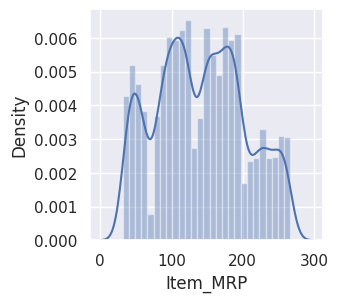

In [61]:
sns.set()
plt.figure(figsize=(3,3))
sns.distplot(big_mart_dataset['Item_MRP'])
plt.show()

<ipython-input-60-ec6f070a3c04>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_dataset['Item_Outlet_Sales'])


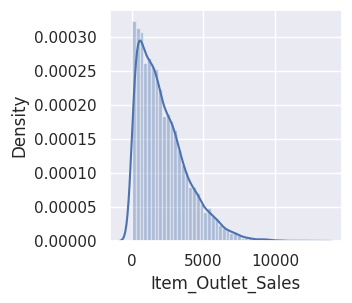

In [60]:
sns.set()
plt.figure(figsize=(3,3))
sns.distplot(big_mart_dataset['Item_Outlet_Sales'])
plt.show()

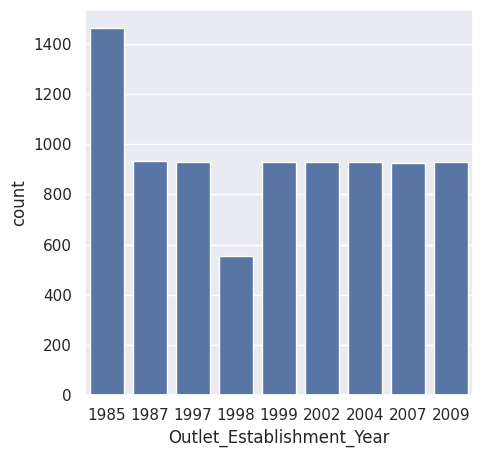

In [68]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_dataset)
plt.show()

In [70]:
big_mart_dataset.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

**Label Encoding**

In [71]:
encoder = LabelEncoder()

In [72]:
big_mart_dataset['Item_Identifier'] = encoder.fit_transform(big_mart_dataset['Item_Identifier'])

big_mart_dataset['Item_Fat_Content'] = encoder.fit_transform(big_mart_dataset['Item_Fat_Content'])

big_mart_dataset['Item_Type'] = encoder.fit_transform(big_mart_dataset['Item_Type'])

big_mart_dataset['Outlet_Identifier'] = encoder.fit_transform(big_mart_dataset['Outlet_Identifier'])

big_mart_dataset['Outlet_Size'] = encoder.fit_transform(big_mart_dataset['Outlet_Size'])

big_mart_dataset['Outlet_Location_Type'] = encoder.fit_transform(big_mart_dataset['Outlet_Location_Type'])

big_mart_dataset['Outlet_Type'] = encoder.fit_transform(big_mart_dataset['Outlet_Type'])

In [74]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Separating Items and Target**

In [75]:
X = big_mart_dataset.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_dataset['Item_Outlet_Sales']

In [76]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4 

In [77]:
#train test splitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [78]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
X_train_prediction = model.predict(X_train)

In [83]:
rsquare_error = metrics.r2_score(X_train_prediction,Y_train)
mean_abs_error = metrics.mean_absolute_error(X_train_prediction,Y_train)
print('R squared error for the train data:',rsquare_error)

R squared error for the train data: 0.8059397082413423


In [84]:
X_test_prediction = model.predict(X_test)

In [85]:
rsquare_error = metrics.r2_score(X_test_prediction,Y_test)
mean_abs_error = metrics.mean_absolute_error(X_test_prediction,Y_test)
print('R squared error for the train data:',rsquare_error)

R squared error for the train data: 0.19723675512368188


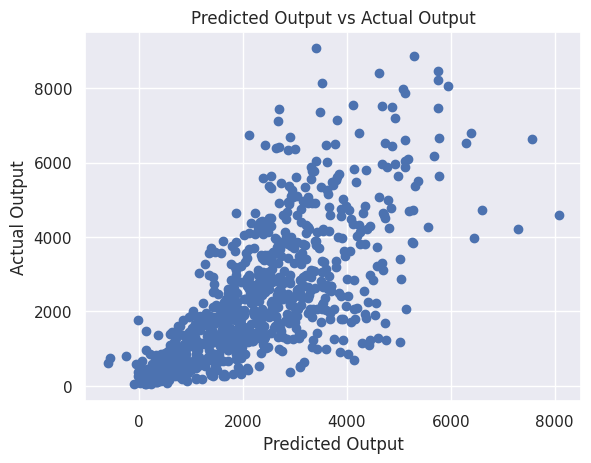

In [86]:
plt.scatter(X_test_prediction,Y_test)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Predicted Output vs Actual Output')
plt.show()